In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
import random

N   = 100
aux = frange(0,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

vx  = np.random.choice(aux, N, replace = True)
vy  = np.random.choice(aux, N, replace = True)
vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

vx = vx*400 + 100
vy = vy*400 + 100
vz = vz*400 + 100

In [64]:
W = np.ndarray([N,6])
W[:,0]=x
W[:,1]=y
W[:,2]=z
W[:,3]=vx
W[:,4]=vy
W[:,5]=vz
# print W

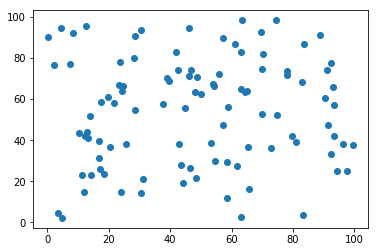

In [65]:
plt.plot(W[:,0],W[:,1],'o')

In [66]:
m = np.ones(len(x))*1e10
# m[0] = 1e20

In [67]:
#calculamos la aceleracion

from aceleracion import *

ax, ay, az = aceleracion.a_str(m,x,y,z,N)

# d = np.ndarray([np.size(a),3])
# d[:,0] = u_str
# d[:,1] = u_gas
# d[:,2] = u_drk
# np.savetxt('energia_potencial0.dat', d, '%12.6f', '\t')

In [68]:
print ax, ay, az

[ -2.79815710e+14  -4.19129887e+15  -4.92367051e+15  -4.23523423e+15
  -1.43768755e+15  -4.53271951e+15  -4.00406755e+15  -1.55484943e+15
  -1.71103276e+14  -5.47911394e+15  -3.55764167e+15  -3.50772153e+15
  -3.01080939e+15  -3.29453761e+15  -5.69836074e+15  -5.60979771e+14
  -2.64735959e+15  -2.64008392e+15  -2.83008038e+15  -3.27293849e+15
  -5.04808659e+15  -1.02868621e+15  -5.68344164e+15  -1.69468169e+14
  -3.40155773e+15  -4.63036720e+15  -4.65984758e+14  -2.27587123e+15
  -3.04208104e+15  -2.66054944e+15  -4.02705368e+15  -3.20682149e+15
  -1.77609004e+15  -9.34739033e+14  -3.83812183e+15  -7.58757915e+14
  -4.96290289e+15  -1.72565330e+15  -4.37566060e+15  -8.80519298e+13
  -1.62968910e+15  -5.39738340e+15  -4.34415917e+15  -1.61059730e+15
  -2.39810640e+14  -3.61644380e+15  -2.33254761e+15  -3.83307631e+15
  -5.47911286e+15  -9.32798244e+14  -3.68286735e+15  -6.02493932e+15
  -1.02800398e+15  -2.22246002e+14  -3.35115951e+15  -5.05284595e+15
  -1.81486353e+15  -4.18582976e+15

In [69]:
R = np.ndarray([N,6])
R[:,0]=vx
R[:,1]=vy
R[:,2]=vz
R[:,3]=ax
R[:,4]=ay
R[:,5]=az
# print R

In [77]:
h = 0.5
for k in range(0,1000):
    for i in range(0,N):
        W[i,:] = W[i,:] + h * R[i,:]
        R[:,0] = W[:,3]
        R[:,1] = W[:,4]
        R[:,2] = W[:,5]
        
        R[:,3], R[:,4], R[:,5] = aceleracion.a_str(m,W[:,0],W[:,1],W[:,2],N)

In [78]:
print W

[[ -2.87689594e+17  -3.30230637e+18  -5.88382699e+18  -1.43881761e+14
   -1.65179422e+15  -2.94280663e+15]
 [ -9.30121363e+18  -3.75933904e+18  -5.19064462e+18  -4.65240910e+15
   -1.88022595e+15  -2.59639652e+15]
 [ -6.07116679e+18  -4.23504486e+18  -2.85001632e+18  -3.03648618e+15
   -2.11819378e+15  -1.42536451e+15]
 [ -5.86143234e+18  -1.19133055e+18  -3.35586041e+18  -2.93165280e+15
   -5.95814688e+14  -1.67835781e+15]
 [ -1.47783629e+18  -2.07533332e+18  -6.89996679e+18  -7.39107993e+14
   -1.03794304e+15  -3.45117131e+15]
 [ -4.91390242e+18  -2.29052056e+18  -4.00674676e+18  -2.45761344e+15
   -1.14572564e+15  -2.00408939e+15]
 [ -2.47658524e+18  -5.76021703e+17  -1.46684195e+17  -1.23860672e+15
   -2.88142637e+14  -7.33605522e+13]
 [ -3.91377917e+18  -3.41271749e+18  -4.31957335e+18  -1.95767415e+15
   -1.70698247e+15  -2.16032974e+15]
 [ -1.82413285e+17  -3.55499095e+18  -3.16637154e+18  -9.12308773e+13
   -1.77794226e+15  -1.58378033e+15]
 [ -7.08845398e+18  -2.10226324e+18  

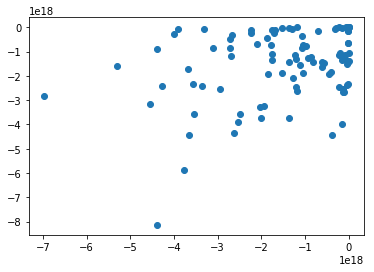

In [76]:
plt.plot(W[:,0],W[:,1],'o')